# EE16A Homework 11

## Question 1: Mechanical Correlation

In [76]:
# Any IPython code here
import numpy as np
from scipy.linalg import circulant as circ
import matplotlib.pyplot as plot

a1 = np.matrix([2, -2, 2, -2, -2, -2, 2, -2, 2, 2])
a2 = np.matrix([1, 2, 3, 4, 5, 6, 7, 6, 5, 4])

b1 = circ(a1)
b2 = circ(a2)
print('Matrix of signal a1')
print(b1)
print('')
print('Matrix of signal a2')
print(b2)
print('')

auto_a1 = np.dot(a1, b1)
auto_a2 = np.dot(a2, b2)

print('Autocorrelation of a1 is:')
print(auto_a1)
print('')
print('Autocorrelation of a2 is:')
print(auto_a2)
print('')

corr_a1a2 = np.dot(a1, b2)
corr_a1a2 = np.dot(a2, b1)

print('Cross-correlation of a1 and a2 is:')
print(corr_a1a2)
print('')
print('Autocorrelation of a2 and a1 is:')
print(corr_a1a2)
print('')

Matrix of signal a1
[[ 2  2  2 -2  2 -2 -2 -2  2 -2]
 [-2  2  2  2 -2  2 -2 -2 -2  2]
 [ 2 -2  2  2  2 -2  2 -2 -2 -2]
 [-2  2 -2  2  2  2 -2  2 -2 -2]
 [-2 -2  2 -2  2  2  2 -2  2 -2]
 [-2 -2 -2  2 -2  2  2  2 -2  2]
 [ 2 -2 -2 -2  2 -2  2  2  2 -2]
 [-2  2 -2 -2 -2  2 -2  2  2  2]
 [ 2 -2  2 -2 -2 -2  2 -2  2  2]
 [ 2  2 -2  2 -2 -2 -2  2 -2  2]]

Matrix of signal a2
[[1 4 5 6 7 6 5 4 3 2]
 [2 1 4 5 6 7 6 5 4 3]
 [3 2 1 4 5 6 7 6 5 4]
 [4 3 2 1 4 5 6 7 6 5]
 [5 4 3 2 1 4 5 6 7 6]
 [6 5 4 3 2 1 4 5 6 7]
 [7 6 5 4 3 2 1 4 5 6]
 [6 7 6 5 4 3 2 1 4 5]
 [5 6 7 6 5 4 3 2 1 4]
 [4 5 6 7 6 5 4 3 2 1]]

Autocorrelation of a1 is:
[[ 40  -8   8  -8   8 -40   8  -8   8  -8]]

Autocorrelation of a2 is:
[[217 208 193 176 161 156 161 176 193 208]]

Cross-correlation of a1 and a2 is:
[[ -6 -18 -22 -10  -6   6  18  22  10   6]]

Autocorrelation of a2 and a1 is:
[[ -6 -18 -22 -10  -6   6  18  22  10   6]]



## Question 2: GPS Receivers

In [104]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys

Populating the interactive namespace from numpy and matplotlib


In [78]:
## RUN THIS FUNCTION BEFORE YOU START THIS PROBLEM
## This function will generate the gold code associated with the satellite ID using linear shift registers
## The satellite_ID can be any integer between 1 and 24
def Gold_code_satellite(satellite_ID):
    codelength = 1023
    registerlength = 10
    
    # Defining the MLS for G1 generator
    register1 = -1*np.ones(registerlength)
    MLS1 = np.zeros(codelength)
    for i in range(codelength):
        MLS1[i] = register1[9]
        modulo = register1[2]*register1[9]
        register1 = np.roll(register1,1)
        register1[0] = modulo
    
    # Defining the MLS for G2 generator
    register2 = -1*np.ones(registerlength)
    MLS2 = np.zeros(codelength)
    for j in range(codelength):
        MLS2[j] = register2[9]
        modulo = register2[1]*register2[2]*register2[5]*register2[7]*register2[8]*register2[9]
        register2 = np.roll(register2,1)
        register2[0] = modulo
    
    delay = np.array([5,6,7,8,17,18,139,140,141,251,252,254,255,256,257,258,469,470,471,472,473,474,509,512,513,514,515,516,859,860,861,862])
    G1_out = MLS1;
    shamt = delay[satellite_ID - 1]
    G2_out = np.roll(MLS2,shamt)
    
    CA_code = G1_out * G2_out
    
    return CA_code

### Part (a)

Correlation:
[-1. -2. -1. ..., -1. -2. -1.]
Offset:
[-1022. -1021. -1020. ...,  1020.  1021.  1022.]
Array:
[[ -1.00000000e+00  -2.00000000e+00  -1.00000000e+00 ...,  -1.00000000e+00
   -2.00000000e+00  -1.00000000e+00]
 [ -1.02200000e+03  -1.02100000e+03  -1.02000000e+03 ...,   1.02000000e+03
    1.02100000e+03   1.02200000e+03]]


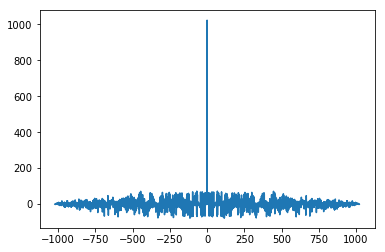

In [79]:
def array_correlation(array1, array2):
    """ This function should return two arrays or a matrix with one row corresponding to 
    the offset and other to the correlation value
    """
    ## YOUR CODE HERE
    ## Use np.correlate with "FULL". Check out the documentation page.
    
# Plot the auto-correlation of satellite 10 with itself. Your signal should be centered
# at offset = 0.
# Use plt.plot or plt.stem to plot.

# YOUR CODE HERE
    corr = np.correlate(array1, array2, 'full')
    offset = np.zeros(len(corr))
    empty = np.array([])
    temp = -(len(array1)-1)
    for elem in offset:
        empty= np.append(empty, temp)
        temp +=1
    print("Correlation:")
    print(corr)
    print("Offset:")
    print(empty)
    return np.vstack((corr, empty))
test = array_correlation(Gold_code_satellite(10), Gold_code_satellite(10))
print("Array:")
print(test)
plt.plot(test[1], test[0])
plt.show()
    #offset = np.array([i for i in range(int(-len(corr)/2))])
    #return offset, corr
#off, corr = array_correlation(Gold_code_satellite(10), Gold_code_satellite(10))
#plt.plot(off, corr)

### Part (b)

Correlation:
[-1. -2. -3. ..., -1. -2. -1.]
Offset:
[-1022. -1021. -1020. ...,  1020.  1021.  1022.]


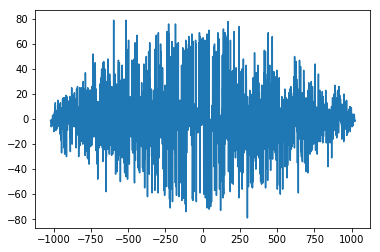

In [80]:
# YOUR CODE HERE
test = array_correlation(Gold_code_satellite(13), Gold_code_satellite(10))
plt.plot(test[1], test[0])
plt.show()

### Part (c)

Correlation:
[ 1.  2.  3. ...,  3.  2.  1.]
Offset:
[-1022. -1021. -1020. ...,  1020.  1021.  1022.]


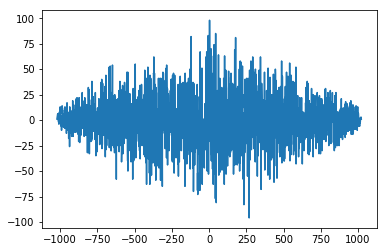

In [81]:
## THIS IS A HELPER FUNCTION FOR PART C
def integernoise_generator(length_of_noise):
    noise_array = np.random.randint(2, size = length_of_noise)
    noise_array = 2 * noise_array - np.ones(size(noise_array))
    return noise_array

# YOUR CODE HERE
test = array_correlation(Gold_code_satellite(13), integernoise_generator(1023))
plt.plot(test[1], test[0])
plt.show()

### Part (d)

Correlation:
[ 1.41131888  3.08650366  2.10247533 ...,  2.63229303  0.14214655
 -1.02972231]
Offset:
[-1022. -1021. -1020. ...,  1020.  1021.  1022.]


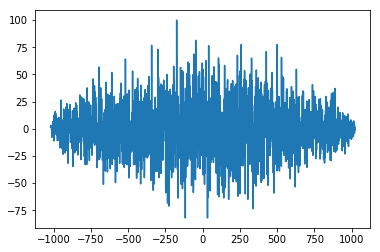

In [82]:
## THIS IS A HELPER FUNCTION FOR PART D
def gaussiannoise_generator(length_of_noise):
    noise_array = np.random.normal(0, 1, length_of_noise)
    return noise_array

# YOUR CODE HERE
test = array_correlation(gaussiannoise_generator(1023), Gold_code_satellite(10))
plt.plot(test[1], test[0])
plt.show()

### Part (e)

Correlation:
[-2.04471178 -6.02205022  0.40042237 ..., -4.2002185  -4.01523887
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


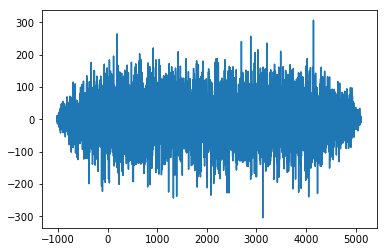

Correlation:
[-2.04471178 -6.02205022 -3.68900119 ..., -4.2002185  -4.01523887
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


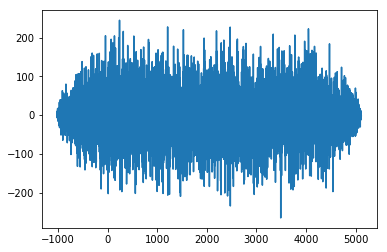

Correlation:
[-2.04471178 -6.02205022 -3.68900119 ...,  1.62086942 -4.01523887
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


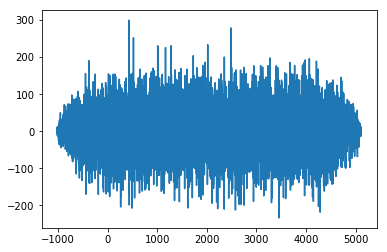

Correlation:
[-2.04471178 -6.02205022 -3.68900119 ..., -1.99082868  1.80584905
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


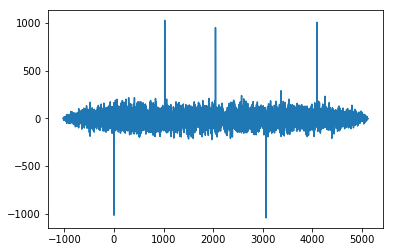

Correlation:
[-2.04471178 -1.93262666  8.35509924 ..., -1.99082868  1.80584905
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


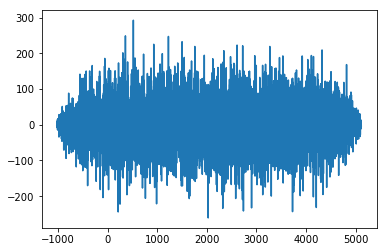

Correlation:
[-2.04471178 -6.02205022  0.40042237 ..., -3.83025924 -1.80584905
  2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


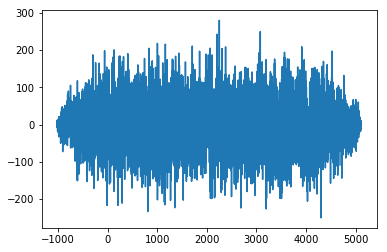

Correlation:
[-2.04471178 -1.93262666  8.35509924 ...,  1.62086942 -4.01523887
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


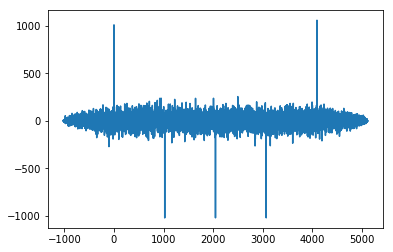

Correlation:
[-2.04471178 -6.02205022  0.40042237 ..., -1.99082868  1.80584905
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


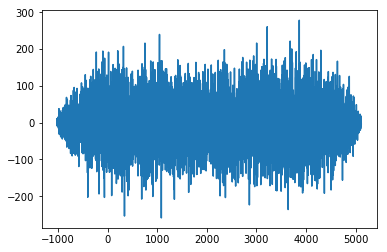

Correlation:
[-2.04471178 -6.02205022 -3.68900119 ..., -3.83025924 -1.80584905
  2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


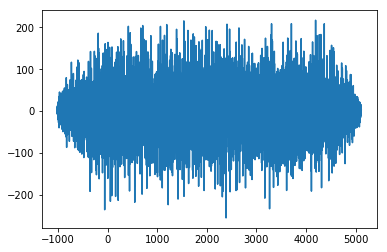

Correlation:
[-2.04471178 -6.02205022  0.40042237 ..., -4.2002185  -4.01523887
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


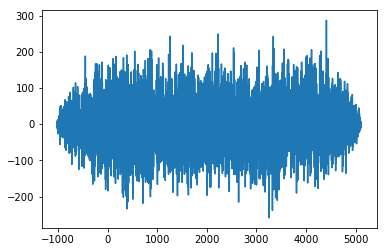

Correlation:
[-2.04471178 -6.02205022 -3.68900119 ..., -4.2002185  -4.01523887
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


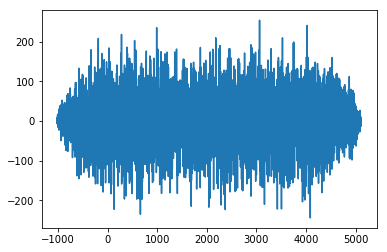

Correlation:
[-2.04471178 -6.02205022 -3.68900119 ..., -4.2002185  -4.01523887
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


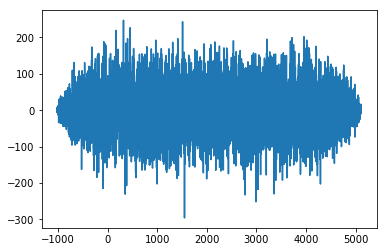

Correlation:
[-2.04471178 -6.02205022 -3.68900119 ..., -4.2002185  -4.01523887
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


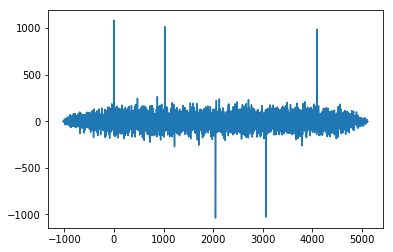

Correlation:
[-2.04471178 -6.02205022 -3.68900119 ...,  1.62086942 -4.01523887
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


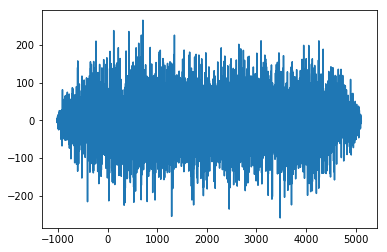

Correlation:
[-2.04471178 -6.02205022 -3.68900119 ...,  3.83025924  1.80584905
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


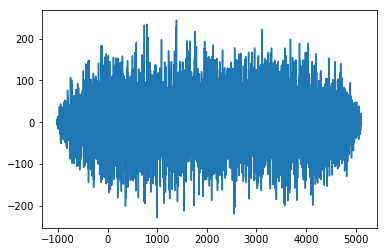

Correlation:
[-2.04471178 -6.02205022 -3.68900119 ..., -1.62086942  4.01523887
  2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


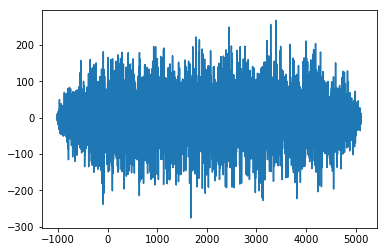

Correlation:
[-2.04471178 -1.93262666  8.35509924 ..., -4.2002185  -4.01523887
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


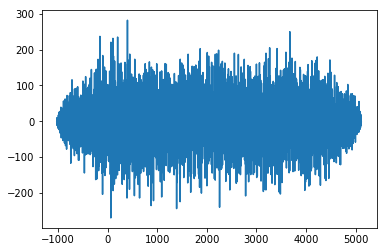

Correlation:
[-2.04471178 -6.02205022  0.40042237 ..., -4.2002185  -4.01523887
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


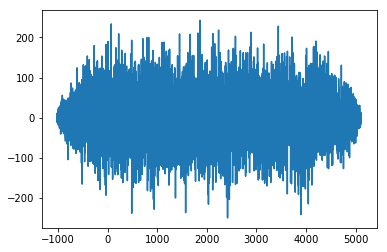

Correlation:
[-2.04471178 -6.02205022 -3.68900119 ..., -4.2002185  -4.01523887
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


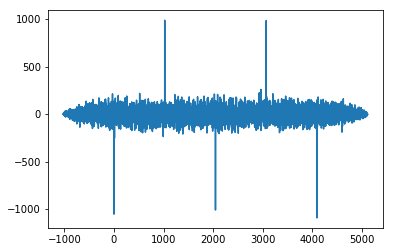

Correlation:
[-2.04471178 -6.02205022 -3.68900119 ..., -4.2002185  -4.01523887
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


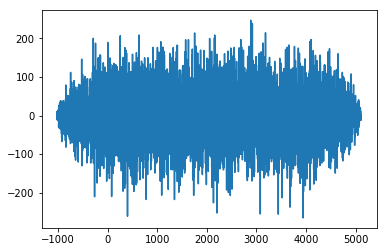

Correlation:
[-2.04471178 -6.02205022 -3.68900119 ...,  1.62086942 -4.01523887
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


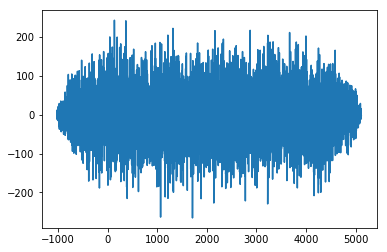

Correlation:
[-2.04471178 -6.02205022 -3.68900119 ..., -1.99082868  1.80584905
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


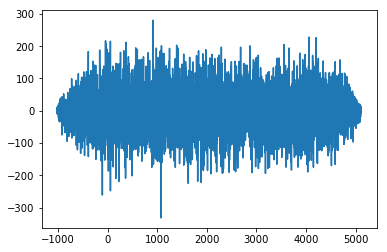

Correlation:
[-2.04471178 -1.93262666  8.35509924 ..., -4.2002185  -4.01523887
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


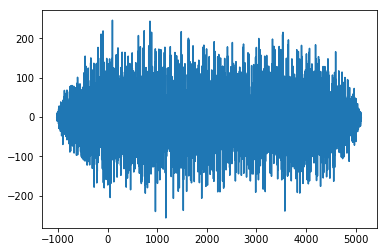

Correlation:
[-2.04471178 -6.02205022 -3.68900119 ..., -4.2002185  -4.01523887
 -2.91054396]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


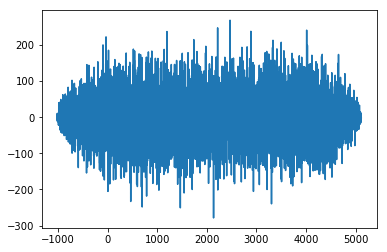

In [83]:
## USE 'np.load' FUNCTION TO LOAD THE DATA
## USE DATA1.NPY AS THE SIGNAL ARRAY

# YOUR CODE HERE
data1 = np.load('data1.npy')
for elem in range(1, 25):
    p = array_correlation(Gold_code_satellite(elem), data1)
    plt.plot(p[1], p[0])
    plt.show()

### Part (f)

Correlation:
[ 1.46613957  0.05545128 -2.60880493 ..., -0.90042287  0.03869585
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


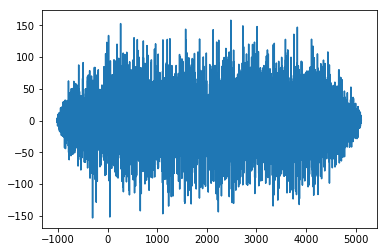

Correlation:
[ 1.46613957  0.05545128  0.3234742  ..., -0.90042287  0.03869585
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


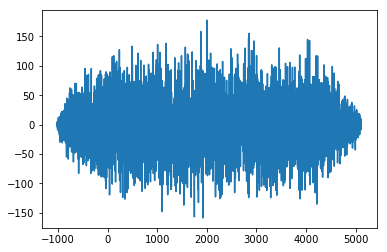

Correlation:
[ 1.46613957  0.05545128  0.3234742  ..., -1.26508906  0.03869585
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


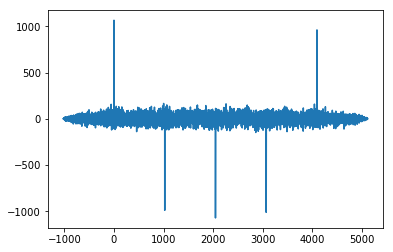

Correlation:
[ 1.46613957  0.05545128  0.3234742  ..., -0.61314838 -0.32597034
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


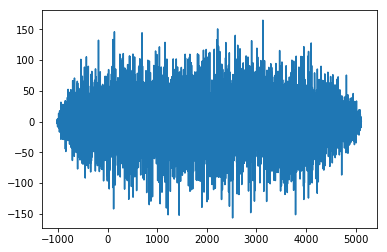

Correlation:
[ 1.46613957 -2.87682786  0.21257165 ..., -0.61314838 -0.32597034
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


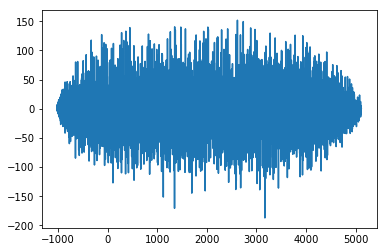

Correlation:
[ 1.46613957  0.05545128 -2.60880493 ...,  0.97781457  0.32597034
 -0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


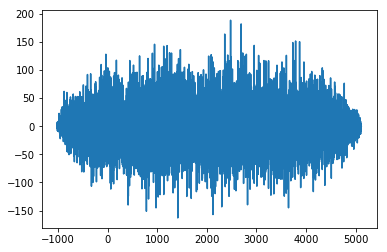

Correlation:
[ 1.46613957 -2.87682786  0.21257165 ..., -1.26508906  0.03869585
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


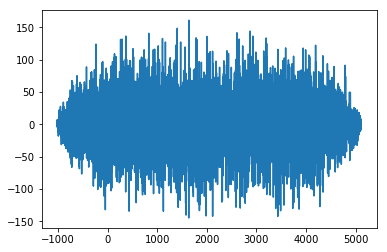

Correlation:
[ 1.46613957  0.05545128 -2.60880493 ..., -0.61314838 -0.32597034
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


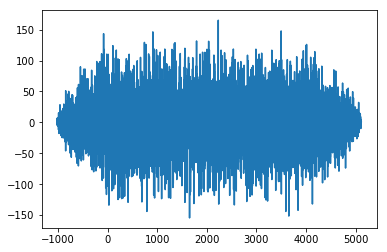

Correlation:
[ 1.46613957  0.05545128  0.3234742  ...,  0.97781457  0.32597034
 -0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


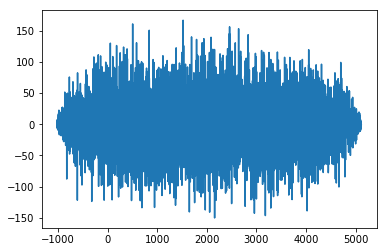

Correlation:
[ 1.46613957  0.05545128 -2.60880493 ..., -0.90042287  0.03869585
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


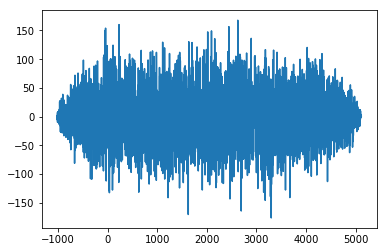

Correlation:
[ 1.46613957  0.05545128  0.3234742  ..., -0.90042287  0.03869585
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


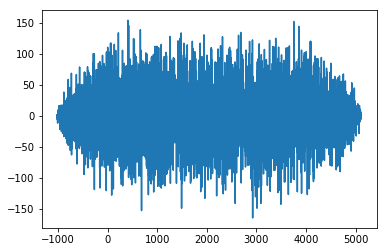

Correlation:
[ 1.46613957  0.05545128  0.3234742  ..., -0.90042287  0.03869585
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


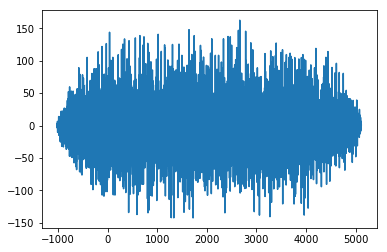

Correlation:
[ 1.46613957  0.05545128  0.3234742  ..., -0.90042287  0.03869585
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


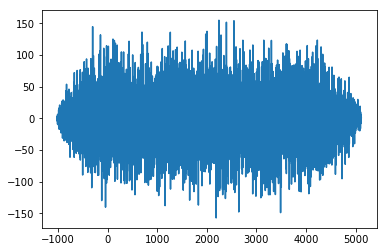

Correlation:
[ 1.46613957  0.05545128  0.3234742  ..., -1.26508906  0.03869585
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


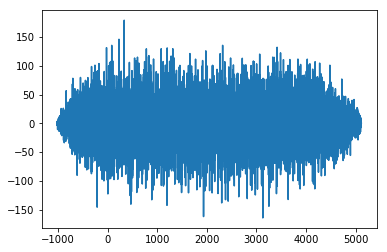

Correlation:
[ 1.46613957  0.05545128  0.3234742  ..., -0.97781457 -0.32597034
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


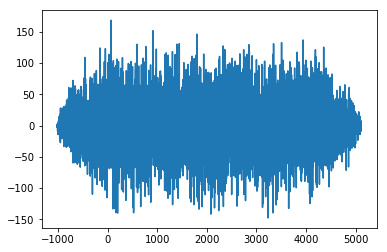

Correlation:
[ 1.46613957  0.05545128  0.3234742  ...,  1.26508906 -0.03869585
 -0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


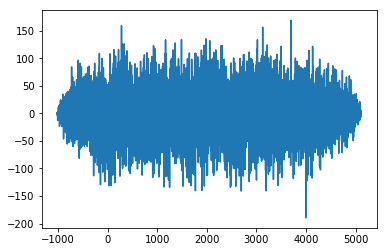

Correlation:
[ 1.46613957 -2.87682786  0.21257165 ..., -0.90042287  0.03869585
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


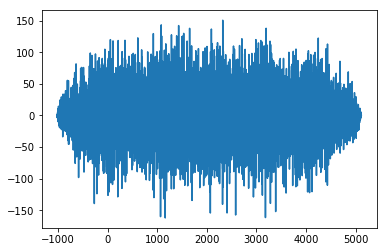

Correlation:
[ 1.46613957  0.05545128 -2.60880493 ..., -0.90042287  0.03869585
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


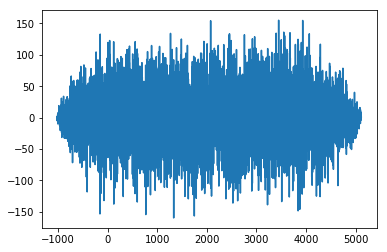

Correlation:
[ 1.46613957  0.05545128  0.3234742  ..., -0.90042287  0.03869585
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


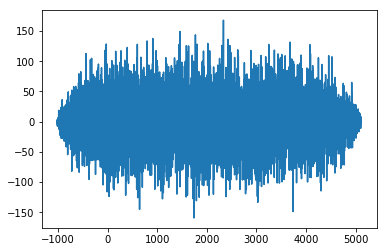

Correlation:
[ 1.46613957  0.05545128  0.3234742  ..., -0.90042287  0.03869585
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


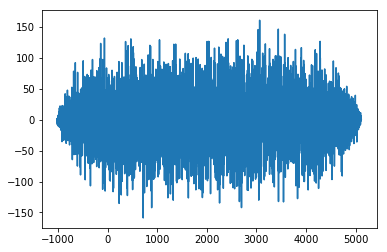

Correlation:
[ 1.46613957  0.05545128  0.3234742  ..., -1.26508906  0.03869585
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


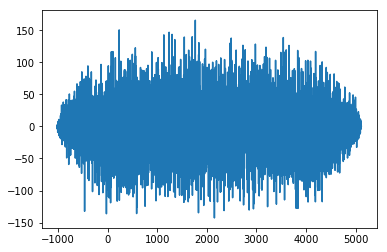

Correlation:
[ 1.46613957  0.05545128  0.3234742  ..., -0.61314838 -0.32597034
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


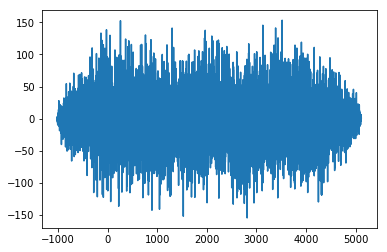

Correlation:
[ 1.46613957 -2.87682786  0.21257165 ..., -0.90042287  0.03869585
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


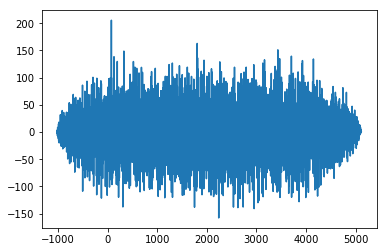

Correlation:
[ 1.46613957  0.05545128  0.3234742  ..., -0.90042287  0.03869585
  0.1823331 ]
Offset:
[-1022. -1021. -1020. ...,  5112.  5113.  5114.]


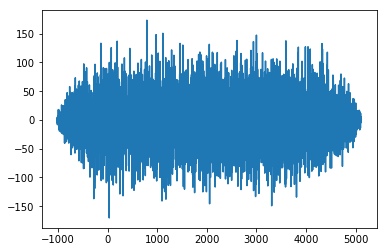

In [84]:
## USE DATA2.NPY AS THE SIGNAL ARRAY

# YOUR CODE HERE
data2 = np.load('data2.npy')
for elem in range(1, 25):
    s = array_correlation(Gold_code_satellite(elem), data2)
    plt.plot(s[1], s[0])
    plt.show()

### Part (g)

Correlation:
[ 0.68688047  2.18910513  1.01392896 ..., -1.07659008 -1.65542388
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


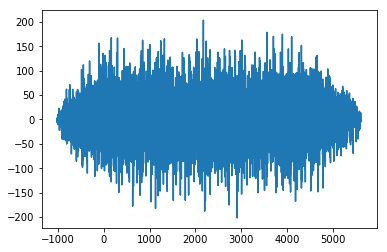

Correlation:
[ 0.68688047  2.18910513  2.38768989 ..., -1.07659008 -1.65542388
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


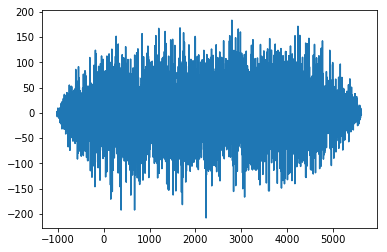

Correlation:
[ 0.68688047  2.18910513  2.38768989 ...,  2.88036113 -1.65542388
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


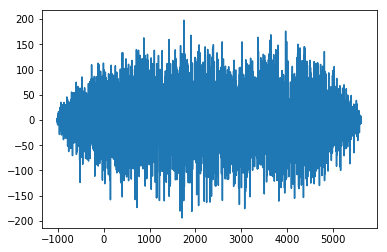

Correlation:
[ 0.68688047  2.18910513  2.38768989 ..., -1.72269354  2.30152734
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


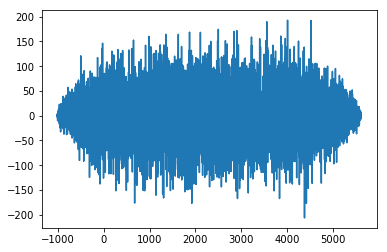

Correlation:
[ 0.68688047  0.8153442  -1.99052037 ..., -1.72269354  2.30152734
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


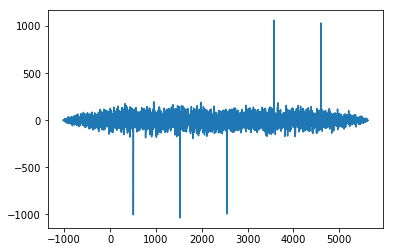

Correlation:
[ 0.68688047  2.18910513  1.01392896 ..., -2.23425767 -2.30152734
  1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


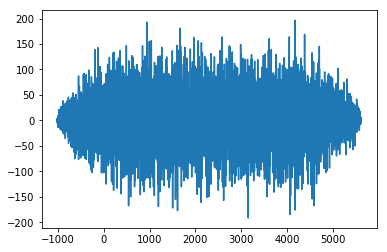

Correlation:
[ 0.68688047  0.8153442  -1.99052037 ...,  2.88036113 -1.65542388
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


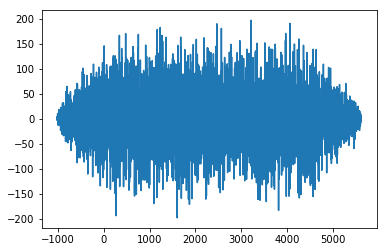

Correlation:
[ 0.68688047  2.18910513  1.01392896 ..., -1.72269354  2.30152734
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


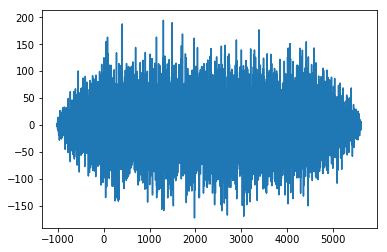

Correlation:
[ 0.68688047  2.18910513  2.38768989 ..., -2.23425767 -2.30152734
  1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


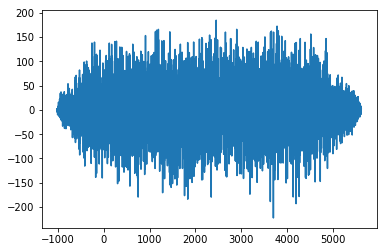

Correlation:
[ 0.68688047  2.18910513  1.01392896 ..., -1.07659008 -1.65542388
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


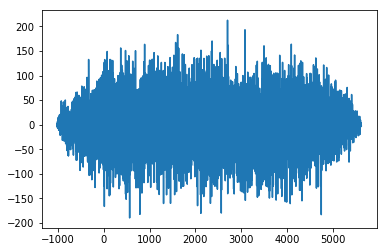

Correlation:
[ 0.68688047  2.18910513  2.38768989 ..., -1.07659008 -1.65542388
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


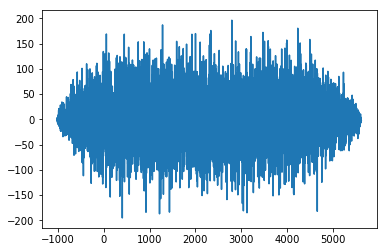

Correlation:
[ 0.68688047  2.18910513  2.38768989 ..., -1.07659008 -1.65542388
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


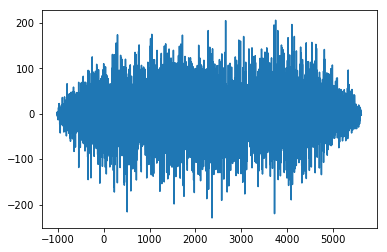

Correlation:
[ 0.68688047  2.18910513  2.38768989 ..., -1.07659008 -1.65542388
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


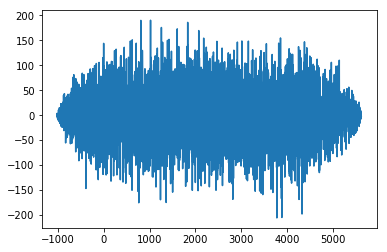

Correlation:
[ 0.68688047  2.18910513  2.38768989 ...,  2.88036113 -1.65542388
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


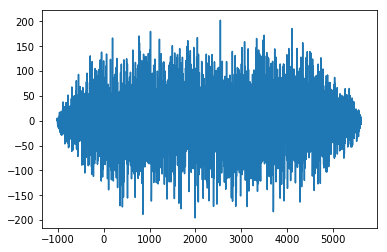

Correlation:
[ 0.68688047  2.18910513  2.38768989 ...,  2.23425767  2.30152734
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


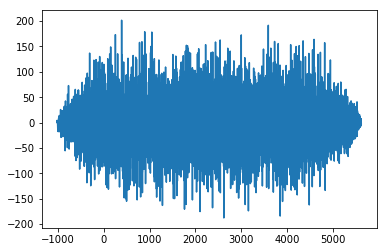

Correlation:
[ 0.68688047  2.18910513  2.38768989 ..., -2.88036113  1.65542388
  1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


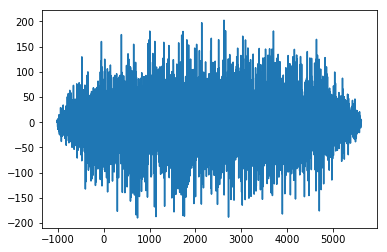

Correlation:
[ 0.68688047  0.8153442  -1.99052037 ..., -1.07659008 -1.65542388
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


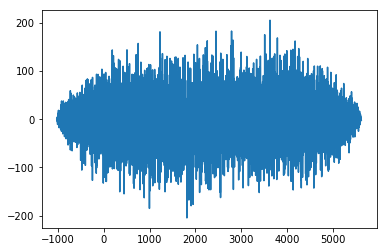

Correlation:
[ 0.68688047  2.18910513  1.01392896 ..., -1.07659008 -1.65542388
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


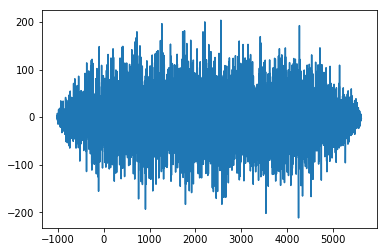

Correlation:
[ 0.68688047  2.18910513  2.38768989 ..., -1.07659008 -1.65542388
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


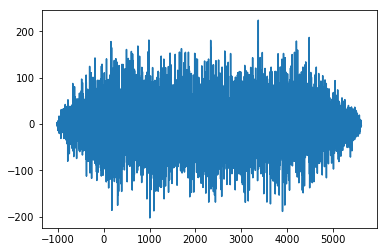

Correlation:
[ 0.68688047  2.18910513  2.38768989 ..., -1.07659008 -1.65542388
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


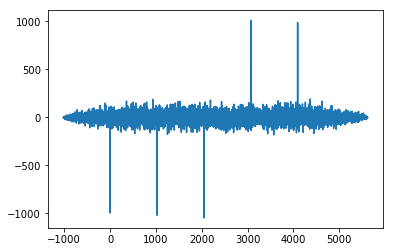

Correlation:
[ 0.68688047  2.18910513  2.38768989 ...,  2.88036113 -1.65542388
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


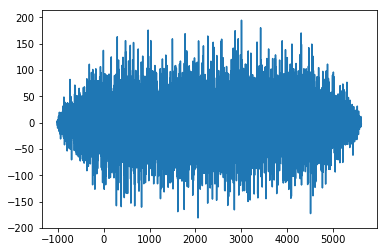

Correlation:
[ 0.68688047  2.18910513  2.38768989 ..., -1.72269354  2.30152734
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


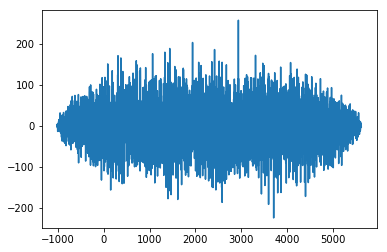

Correlation:
[ 0.68688047  0.8153442  -1.99052037 ..., -1.07659008 -1.65542388
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


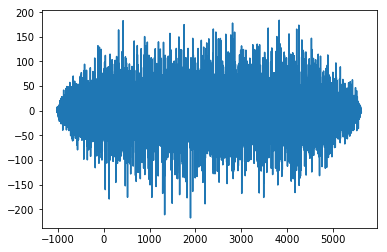

Correlation:
[ 0.68688047  2.18910513  2.38768989 ..., -1.07659008 -1.65542388
 -1.97847561]
Offset:
[-1022. -1021. -1020. ...,  5618.  5619.  5620.]


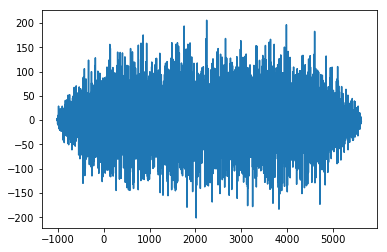

In [85]:
## USE DATA3.NPY AS THE SIGNAL ARRAY

# YOUR CODE HERE
data3 = np.load('data3.npy')
for elem in range(1, 25):
    r = array_correlation(Gold_code_satellite(elem), data3)
    plt.plot(r[1], r[0])
    plt.show()

## Question 3: Finding Signals in Noise

In [86]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.linalg as la
import pylab as plt
import numpy.random

In [87]:
N = 1000

def rand_vector(n): # returns a random {+1, -1} vector of length n
    return np.random.randint(2, size=n)*2 - 1.0

def rand_normed_vector(n): # returns a random normalized vector of length n
    x = rand_vector(n)
    return x / la.norm(x)

def cross_corr(f, g):
    # returns the cross-correlation (a vector of all the inner products of 'g' with shifted versions of 'f')
    C = la.circulant(f)
    corr = C.T.dot(g)
    return corr

### Part (a)

-0.048
-0.048


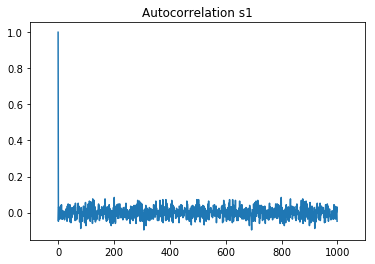

In [88]:
# Generate a random normalized vector for s1
# Running this cell again will generate a new random vector
s1 = rand_normed_vector(N)

# Compute all the inner products of s1 with shifted versions of s1
# (i.e., the cross-correlation of s1 with s1)
corr = cross_corr(s1, s1)

# The inner product <s1, s1^(1)> is:
print(corr[1])

# np.roll circularly shifts the signal,
# so the above inner product could be computed as:
print(np.dot(s1, np.roll(s1,1)))

# Plot the autocorrelation:
plt.title("Autocorrelation s1")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])

plt.show()

### Part (b)

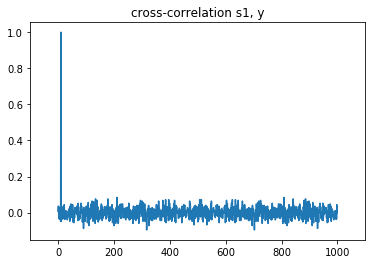

10


In [89]:
y = np.roll(s1, 10) # Received y = s1 shifted by 10

# Compute the cross-correlation (all the inner products of y with shifted versions of s1)
corr = cross_corr(s1, y)

# Plot
plt.title("cross-correlation s1, y")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

# Find the index of maximum correlation (inner product)
print(np.argmax(corr))

### Part (c)

In [90]:
# Generate a random normalized vector for s1
# and a random normalized vector for n
# Running this cell again will generate new random vectors
s1 = rand_normed_vector(N)
n = rand_normed_vector(N)

print(np.abs(np.dot(s1, n)))

0.014


### Part (d)

This is the code from part (b) but with the received signal $\vec{y}$, which is corrupted by noise.

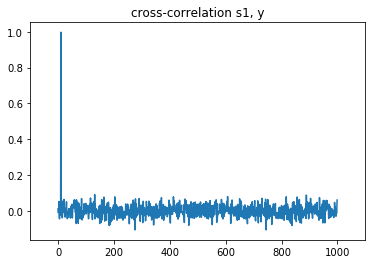

10

In [91]:
s1 = rand_normed_vector(N)
n = rand_normed_vector(N)
y = np.roll(s1, 10) + 0.1*n

corr = cross_corr(s1, y)

plt.title("cross-correlation s1, y")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

# Find the index of maximum correlation (inner product)
np.argmax(corr)

### Part (e)

Copy the code provided for part (d), but modify it appropriately, so that the noise is higher.
You should generate two cross-correlation plots, one for each noise level in the question.
(You can just copy the code from part (d) twice.)

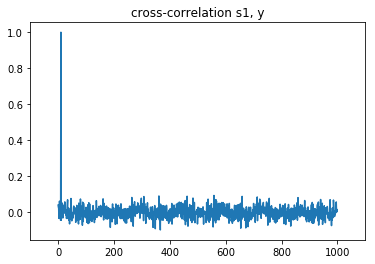

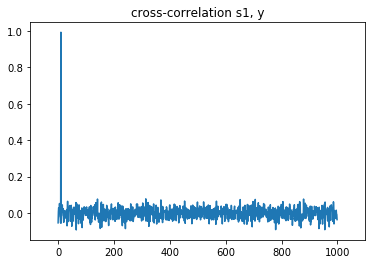

10

In [92]:
# YOUR CODE HERE
s1 = rand_normed_vector(N)
n = rand_normed_vector(N)
y = np.roll(s1, 10) + 0.1*n

corr = cross_corr(s1, y)

plt.title("cross-correlation s1, y")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

# Find the index of maximum correlation (inner product)
np.argmax(corr)
# YOUR CODE HERE
s1 = rand_normed_vector(N)
n = rand_normed_vector(N)
y = np.roll(s1, 10) + 0.1*n

corr = cross_corr(s1, y)

plt.title("cross-correlation s1, y")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

# Find the index of maximum correlation (inner product)
np.argmax(corr)

### Part (f)

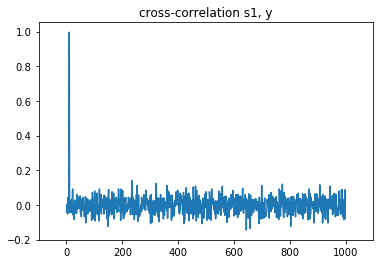

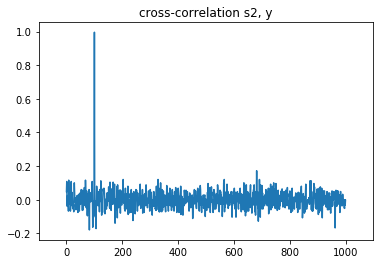

10 100


In [93]:
s1 = rand_normed_vector(N)
s2 = rand_normed_vector(N)

y = np.roll(s1, 10) + np.roll(s2, 100)

# Compute cross-correlations:
corr_s1_y = cross_corr(s1, y)
corr_s2_y = cross_corr(s2, y)

# Plot cross-correlations:
plt.title("cross-correlation s1, y")
plt.plot(cross_corr(s1, y))
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

plt.title("cross-correlation s2, y")
plt.plot(cross_corr(s2, y))
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

j = np.argmax(corr_s1_y) # find the first signal delay (max index of correlation)
k = np.argmax(corr_s2_y) # find the second signal delay
print(j, k)

### Part (g)

This is the same code as in part (f) but with a slight modification to how the received signal y generated.
Run the below cell a few times to test for different choices of random signals.

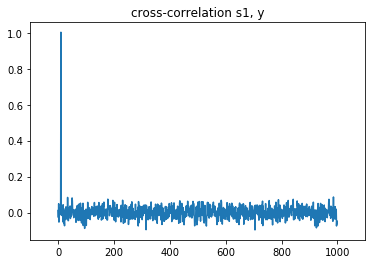

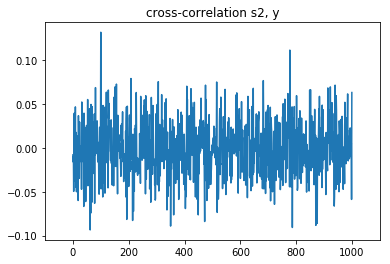

In [94]:
s1 = rand_normed_vector(N)
s2 = rand_normed_vector(N)

y = np.roll(s1, 10) + 0.1*np.roll(s2, 100)

# Compute cross-correlations:
corr_s1_y = cross_corr(s1, y)
corr_s2_y = cross_corr(s2, y)

# Plot cross-correlations:
plt.title("cross-correlation s1, y")
plt.plot(cross_corr(s1, y))
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

plt.title("cross-correlation s2, y")
plt.plot(cross_corr(s2, y))
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

### Part (h)

10


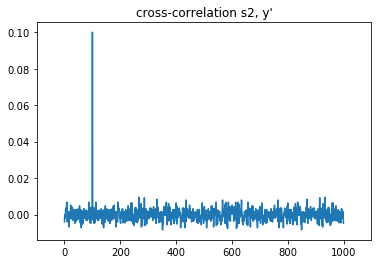

100


In [95]:
corr_s1_y = cross_corr(s1, y)
j = np.argmax(corr_s1_y) # find the first signal delay
print(j)

# Subtract out the contribution of the first signal
y_prime = y - np.roll(s1, j)

# Correlate the residual against the second signal
corr_s2_y = cross_corr(s2, y_prime)

# Plot 
plt.title("cross-correlation s2, y'")
plt.plot(corr_s2_y)
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

k = np.argmax(corr_s2_y) # find the second signal delay by looking at the index of max correlation
print(k)

### Part (i)

In [96]:
s1 = rand_normed_vector(N)
s2 = rand_normed_vector(N)

y = 0.7*np.roll(s1, 10) + 0.5*np.roll(s2, 100)

corr_s1_y = cross_corr(s1, y)
j = np.argmax(corr_s1_y) # find the first signal delay

corr_s2_y = cross_corr(s2, y)
k = np.argmax(corr_s2_y) # find the second signal delay

print(j, k)

# Once we have found the shifts, estimate the coefficients as inner products:
a1 = np.dot(y, np.roll(s1, j))
a2 = np.dot(y, np.roll(s2, k))

print(a1, a2)

10 100
0.701 0.5014


### Part (j)

This is the same code as in part (i) but with noise added to the received signal $\vec{y}$.

In [97]:
s1 = rand_normed_vector(N)
s2 = rand_normed_vector(N)
n = rand_normed_vector(N)

y = 0.7*np.roll(s1, 10) + 0.5*np.roll(s2, 100) + 0.1*n

corr_s1_y = cross_corr(s1, y)
j = np.argmax(corr_s1_y) # find the first signal delay

corr_s2_y = cross_corr(s2, y)
k = np.argmax(corr_s2_y) # find the second signal delay

print(j, k)

# Once we have found the shifts, estimate the coefficients as inner products:
a1 = np.dot(y, np.roll(s1, j))
a2 = np.dot(y, np.roll(s2, k))

print(a1, a2)

10 100
0.6708 0.4626


## Question 5: Image Analysis

In [98]:
def plot_circle(a, d, e):
    """
    You can use this function to plot circles with parameters a,d,e.
    The parameters are described in the homework pdf. 
    
    You can comment out the line that starts with `plt.title`
    because this makes assumptions regarding the title of your plot.
    """
    is_circle = d**2 + e**2 - 4*a > 0
    assert is_circle, "Not a circle"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 2
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a*(x**2 + y**2) + d*x + e*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(r'${:.2f}(x^2 + y^2) {:+.2f}x {:+.2f}y$'.format(a,d,e))

In [99]:
def plot_ellipse(a, b, c, d, e):
    """
    You can use this function to plot ellipses with parameters a-e.
    The parameters are described in the homework pdf. 
    
    You can comment out the line that starts with `plt.title`
    because this makes assumptions regarding the title of your plot.
    """
    is_ellipse = b**2 - 4*a*c < 0
    assert is_ellipse, "Not an ellipse"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 2
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a*x**2 + b*x*y + c*y**2 + d*x + e*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(r'${:.2f}x^2 {:+.2f}xy {:+.2f}y^2 {:+.2f}x {:+.2f}y$'.format(a,b,c,d,e))

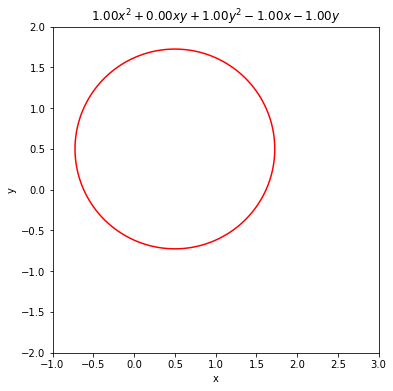

In [100]:
# Here is an example of plot_ellipse.
# This plots (x-1)**2 + (y-1)**2 = 1, 
# which is a circle centered at (1,1). 

plt.figure(figsize=(6,6))
plot_ellipse(1, 0, 1, -1, -1)

You may find [plt.scatter](http://matplotlib.org/api/pyplot_api.html) useful for plotting the points.

### Part (c)

[[ 4.87314137]
 [-7.89293482]
 [-0.22651484]]
0.137490562243
None


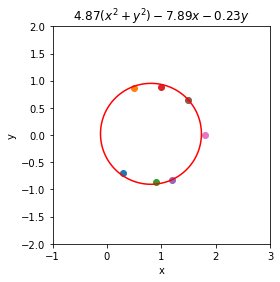

In [101]:
# YOUR CODE HERE
import numpy as np
a = np.matrix('0.5661 0.3 -0.69; \
               1.0069 0.5 0.87; \
               1.5496 0.9 -0.86; \
               1.7744 1 0.88; \
               2.1124 1.2 -0.82; \
               2.6596 1.5 0.64; \
               3.24 1.8 0')
b = np.ones((7, 1))
result = np.linalg.inv(a.transpose() * a) * a.transpose() * b
print(result)

norm = np.linalg.norm((a * result) - b)
print (norm/7)

plt.scatter(0.3, -0.69)
plt.scatter(0.5, 0.87)
plt.scatter(0.9, -0.86)
plt.scatter(1, 0.88)
plt.scatter(1.2, -0.82)
plt.scatter(1.5, 0.64)
plt.scatter(1.8, 0)

circle = plot_circle(4.87314137, -7.89293482, -0.2265148)
print (circle)

### Part (d)

[[ 3.1815826 ]
 [-0.08115151]
 [ 4.00741376]
 [-5.16116482]
 [-0.12447289]]
0.0462909360038
None


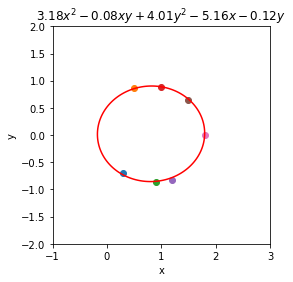

In [102]:
# YOUR CODE HERE
import numpy as np
a = np.matrix('0.09 -0.207 0.4761 0.3 -0.69; \
               0.25 0.435 0.7569 0.5 0.87; \
               0.81 -0.774 0.7396 0.9 -0.86; \
               1 0.88 0.7744 1 0.88; \
               1.44 0.86592 0.6724 1.2 -0.82; \
               2.25 0.96 0.4096 1.5 0.64; \
               3.24 0 0 1.8 0')
b = np.ones((7, 1))
result = np.linalg.inv(a.transpose()* a) * a.transpose() * b
print(result)

norm = np.linalg.norm((a * result) - b)
print (norm/7)

plt.scatter(0.3, -0.69)
plt.scatter(0.5, 0.87)
plt.scatter(0.9, -0.86)
plt.scatter(1, 0.88)
plt.scatter(1.2, -0.82)
plt.scatter(1.5, 0.64)
plt.scatter(1.8, 0)

ellipse = plot_ellipse(3.1815826, -0.08115151, 4.00741376, -5.16116482, -0.12447289)
print (ellipse)